In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
import warnings
import array
import datetime

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import zero_one_loss
from sklearn.metrics import classification_report
from sklearn.metrics import root_mean_squared_error
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVR
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from sklearn.model_selection  import cross_val_score
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.metrics import jaccard_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multioutput import ClassifierChain
from sklearn.dummy import DummyClassifier

#warnings.filterwarnings('ignore', category=UserWarning) 

In [46]:
subPlots_Title_fontSize = 12
subPlots_xAxis_fontSize = 10
subPlots_yAxis_fontSize = 10
subPlots_label_fontSize = 10
heatmaps_text_fontSize = 8

plots_Title_fontSize = 14
plots_Title_textColour = 'black'

plots_Legend_fontSize = 12
plots_Legend_textColour = 'black'

In [47]:
#dfs_dataset = spark.sql("SELECT * FROM `default`.`thisthesis_dataset`")
#dfs_dataset.write.csv('abfss://reisasynapse2@reisadatalake001.dfs.core.windows.net/salesintelligence/thisthesis_dataset.csv')
#dfpd_dataset = dfs_dataset.toPandas()
dfpd_dataset = pd.read_csv('thisthesis_dataset.csv', sep=",")
#dfpd_dataset.fillna(0.0, inplace=True)
#dfpd_dataset.rename(columns={'MEETINGS_F2F Meetings': 'MEETINGS_F2F_Meetings', 'Web Site_GSKPRO': 'Web_Site_GSKPRO', 'F2F_PHONE CALL': 'F2F_PHONE_CALL', 'MEETINGS_REMOTE MEETING': 'MEETINGS_REMOTE_MEETING', 'MEETINGS_VIRTUAL VISIT': 'MEETINGS_VIRTUAL_VISIT'})
dfpd_dataset.describe(include='all').T
#dfpd_dataset.set_index('hcpid', inplace=True)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
hcpid,133230,133230,0014M00001e5ivLQAQ,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CDGMEDICO,133230.0,NaN,NaN,NaN,26397527.639503,22609568.435197,2.0,2872701.75,30062682.0,45768582.75,85141752.0
clinical_investigator,133230.0,NaN,NaN,NaN,0.000608,0.02465,0.0,0.0,0.0,0.0,1.0
speaker,133230.0,NaN,NaN,NaN,0.005149,0.071572,0.0,0.0,0.0,0.0,1.0
gender,133230.0,NaN,NaN,NaN,2.775186,0.57454,1.0,3.0,3.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
F2F_f2f,133230.0,NaN,NaN,NaN,5.299317,9.173914,0.0,0.0,0.0,9.0,93.0
Web Site_GSKPRO,133230.0,NaN,NaN,NaN,0.158523,3.55164,0.0,0.0,0.0,0.0,940.0
F2F_PHONE CALL,133230.0,NaN,NaN,NaN,0.037972,0.279326,0.0,0.0,0.0,0.0,12.0
MEETINGS_REMOTE MEETING,133230.0,NaN,NaN,NaN,0.158463,0.591509,0.0,0.0,0.0,0.0,13.0


# Manter apenas e-Mail_1to1

In [48]:
labels_only     = [
                    'MEETINGS_F2F_Meetings',
                    'F2F_PHONE_CALL',
                    'MEETINGS_REMOTE_MEETING',
                    'e-Mail_1to1',
                    'e-Mail_Mass',
                    'Webinar_Webinar',
                    'F2F_f2f',
                    'Web Site_GSKPRO'
                    #,
                    #'MEETINGS_VIRTUAL_VISIT'
                    ]
labels_         = [ 'hcpid',
                    'e-Mail_1to1',
                    'MEETINGS_F2F Meetings',
                    'e-Mail_Mass',
                    'Webinar_Webinar',
                    'F2F_f2f',
                    'Web Site_GSKPRO',
                    'F2F_PHONE CALL',
                    'MEETINGS_REMOTE MEETING'
                    #,
                    #'MEETINGS_VIRTUAL VISIT'
                    ]
labels = ['hcpid', 'F2F_f2f']
variables_remover = ['CDGMEDICO', 
                    'e-Mail_1to1',
                    'MEETINGS_F2F Meetings',
                    'e-Mail_Mass',
                    'Webinar_Webinar',
                    'F2F_f2f',
                    'Web Site_GSKPRO',
                    'F2F_PHONE CALL',
                    'MEETINGS_REMOTE MEETING'
                    #,
                    #'MEETINGS_VIRTUAL VISIT'
                    ]

for c in labels_:
    if c != 'hcpid':
        try:
            dfpd_dataset.loc[dfpd_dataset[c] > 0, c] = 1
            dfpd_dataset.loc[dfpd_dataset[c] == 0, c] = 0
        except KeyError as error:
            print(error)
#dfpd_dataset.drop(labels_remover, axis=1, inplace=True)
ds_features = dfpd_dataset.copy().drop(variables_remover, axis=1)
ds_target = dfpd_dataset[labels_].copy()
ds_target.rename(columns={"MEETINGS_F2F Meetings": "MEETINGS_F2F_Meetings", "F2F_PHONE CALL": "F2F_PHONE_CALL", "MEETINGS_REMOTE MEETING":"MEETINGS_REMOTE_MEETING", "MEETINGS_VIRTUAL VISIT":"MEETINGS_VIRTUAL_VISIT"}, inplace=True)

In [49]:
dfpd_dataset["gender"] = dfpd_dataset["gender"].astype(str)
dfpd_dataset.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
hcpid,133230,133230,0014M00001e5ivLQAQ,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CDGMEDICO,133230.0,NaN,NaN,NaN,26397527.639503,22609568.435197,2.0,2872701.75,30062682.0,45768582.75,85141752.0
clinical_investigator,133230.0,NaN,NaN,NaN,0.000608,0.02465,0.0,0.0,0.0,0.0,1.0
speaker,133230.0,NaN,NaN,NaN,0.005149,0.071572,0.0,0.0,0.0,0.0,1.0
gender,133230,3,3,113658,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
F2F_f2f,133230.0,NaN,NaN,NaN,0.418817,0.493367,0.0,0.0,0.0,1.0,1.0
Web Site_GSKPRO,133230.0,NaN,NaN,NaN,0.014261,0.118566,0.0,0.0,0.0,0.0,1.0
F2F_PHONE CALL,133230.0,NaN,NaN,NaN,0.02528,0.156974,0.0,0.0,0.0,0.0,1.0
MEETINGS_REMOTE MEETING,133230.0,NaN,NaN,NaN,0.099204,0.298937,0.0,0.0,0.0,0.0,1.0


In [50]:
ds_features.set_index('hcpid', inplace=True)
print(ds_features.shape)
ds_features.describe(include='all').T

(133230, 53)


,count,mean,std,min,25%,50%,75%,max
clinical_investigator,133230.0,0.000608,0.024650,0.0,0.0,0.0,0.0,1.0
speaker,133230.0,0.005149,0.071572,0.0,0.0,0.0,0.0,1.0
gender,133230.0,2.775186,0.574540,1.0,3.0,3.0,3.0,3.0
Anesthesiology,133230.0,0.049223,0.216334,0.0,0.0,0.0,0.0,1.0
Cardiovascular Disease,133230.0,0.067102,0.250200,0.0,0.0,0.0,0.0,1.0
Dermatology,133230.0,0.069744,0.254716,0.0,0.0,0.0,0.0,1.0
Gastroenterology,133230.0,0.022615,0.148673,0.0,0.0,0.0,0.0,1.0
General Medicine,133230.0,0.435638,0.495842,0.0,0.0,0.0,1.0,1.0
Hematology,133230.0,0.009893,0.098969,0.0,0.0,0.0,0.0,1.0
Nephrology,133230.0,0.012377,0.110562,0.0,0.0,0.0,0.0,1.0


In [51]:
ds_features.head(100)

,clinical_investigator,speaker,gender,Anesthesiology,Cardiovascular Disease,Dermatology,Gastroenterology,General Medicine,Hematology,Nephrology,...,G04-HPB TNS,N06-ANTDEPRESSAO-SSRI,R03-ICS LABA ASMA SRT,N03-LAMOTRIGINAS,D06-TARGET BACTROBAN,R03-TARGET TRELEGY,J01-ZINNAT PREMIUM,R03-TARGET VANISTO,R03-TARGET ANORO,MEETINGS_VIRTUAL VISIT
hcpid,,,,,,,,,,,,,,,,,,,,,
0016100000Np15GAAR,0,0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0016100000Np2rBAAR,0,0,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,29.0,1.0,0.0,0.0,1.0,5.0,0.0,0.0,0.0
0016100000SGW0vAAH,0,0,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,4.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
0016100000NoYYVAA3,0,0,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
0016100000RYAp0AAH,0,0,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0016100000NokvbAAB,0,0,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,35.0,0.0,0.0,0.0,0.0,72.0,0.0,0.0,0.0
0016100000NopkbAAB,0,0,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,33.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0
0016100000SGBfSAAX,0,0,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
ds_truevalues = pd.melt(ds_target, id_vars=['hcpid'], value_vars=labels_only, var_name='channel', value_name='truevalue', ignore_index=True).set_index('hcpid')
ds_truevalues['yvalue'] = 0.0
ds_truevalues.head(100)

,channel,truevalue,yvalue
hcpid,,,
0016100000Np15GAAR,MEETINGS_F2F_Meetings,0.0,0.0
0016100000Np2rBAAR,MEETINGS_F2F_Meetings,0.0,0.0
0016100000SGW0vAAH,MEETINGS_F2F_Meetings,0.0,0.0
0016100000NoYYVAA3,MEETINGS_F2F_Meetings,0.0,0.0
0016100000RYAp0AAH,MEETINGS_F2F_Meetings,0.0,0.0
...,...,...,...
0016100000NokvbAAB,MEETINGS_F2F_Meetings,0.0,0.0
0016100000NopkbAAB,MEETINGS_F2F_Meetings,0.0,0.0
0016100000SGBfSAAX,MEETINGS_F2F_Meetings,0.0,0.0


In [53]:
table_targets = pd.crosstab(index=ds_truevalues['channel'], columns=ds_truevalues['truevalue'])
display(table_targets)

truevalue,0.0,1.0
channel,,
F2F_PHONE_CALL,129862,3368
F2F_f2f,77431,55799
MEETINGS_F2F_Meetings,125134,8096
MEETINGS_REMOTE_MEETING,120013,13217
Web Site_GSKPRO,131330,1900
Webinar_Webinar,132731,499
e-Mail_1to1,108312,24918
e-Mail_Mass,19747,113483


In [54]:
ds_target_MC = ds_target.copy()
ds_target_MC['MC_label'] = ds_target_MC[labels_only].apply(lambda x: "#".join(x.astype(str)), axis=1)
#ds_target_MC['MC_label'] = ds_target_MC[labels_only].agg('-'.join, axis=1)
#ds_target_MC['MC_label'] = ds_target_MC['e-Mail_1to1'].astype(str) + ds_target_MC['MEETINGS_F2F_Meetings'].astype(str)
ds_target_MC.head(100)

,hcpid,e-Mail_1to1,MEETINGS_F2F_Meetings,e-Mail_Mass,Webinar_Webinar,F2F_f2f,Web Site_GSKPRO,F2F_PHONE_CALL,MEETINGS_REMOTE_MEETING,MC_label
0,0016100000Np15GAAR,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0#0.0#0.0#0.0#1.0#0.0#0.0#0.0
1,0016100000Np2rBAAR,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0#0.0#0.0#0.0#0.0#0.0#1.0#0.0
2,0016100000SGW0vAAH,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0#0.0#0.0#0.0#0.0#0.0#1.0#0.0
3,0016100000NoYYVAA3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0#0.0#0.0#1.0#1.0#0.0#1.0#0.0
4,0016100000RYAp0AAH,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0#0.0#0.0#0.0#0.0#0.0#1.0#0.0
...,...,...,...,...,...,...,...,...,...,...
95,0016100000NokvbAAB,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0#0.0#0.0#0.0#1.0#0.0#1.0#0.0
96,0016100000NopkbAAB,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0#0.0#0.0#0.0#1.0#0.0#0.0#0.0
97,0016100000SGBfSAAX,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0#0.0#0.0#0.0#1.0#0.0#0.0#0.0
98,0016100000SGcAqAAL,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0#0.0#0.0#0.0#0.0#0.0#1.0#0.0


In [55]:
ds_target.set_index('hcpid', inplace=True)
ds_target_MC.set_index('hcpid', inplace=True)
ds_target_MC.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
e-Mail_1to1,133230.0,NaN,NaN,NaN,0.18703,0.389937,0.0,0.0,0.0,0.0,1.0
MEETINGS_F2F_Meetings,133230.0,NaN,NaN,NaN,0.060767,0.238904,0.0,0.0,0.0,0.0,1.0
e-Mail_Mass,133230.0,NaN,NaN,NaN,0.851783,0.355317,0.0,1.0,1.0,1.0,1.0
Webinar_Webinar,133230.0,NaN,NaN,NaN,0.003745,0.061085,0.0,0.0,0.0,0.0,1.0
F2F_f2f,133230.0,NaN,NaN,NaN,0.418817,0.493367,0.0,0.0,0.0,1.0,1.0
Web Site_GSKPRO,133230.0,NaN,NaN,NaN,0.014261,0.118566,0.0,0.0,0.0,0.0,1.0
F2F_PHONE_CALL,133230.0,NaN,NaN,NaN,0.02528,0.156974,0.0,0.0,0.0,0.0,1.0
MEETINGS_REMOTE_MEETING,133230.0,NaN,NaN,NaN,0.099204,0.298937,0.0,0.0,0.0,0.0,1.0
MC_label,133230,148,0.0#0.0#0.0#0.0#1.0#0.0#0.0#0.0,72324,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
print(ds_target['e-Mail_1to1'].value_counts())
ds_target.head(100)

e-Mail_1to1
0.0    108312
1.0     24918
Name: count, dtype: int64


,e-Mail_1to1,MEETINGS_F2F_Meetings,e-Mail_Mass,Webinar_Webinar,F2F_f2f,Web Site_GSKPRO,F2F_PHONE_CALL,MEETINGS_REMOTE_MEETING
hcpid,,,,,,,,
0016100000Np15GAAR,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
0016100000Np2rBAAR,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
0016100000SGW0vAAH,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
0016100000NoYYVAA3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
0016100000RYAp0AAH,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
0016100000NokvbAAB,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
0016100000NopkbAAB,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
0016100000SGBfSAAX,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [57]:
demographic = ["clinical_investigator","speaker","Anesthesiology","Cardiovascular Disease","Dermatology","Gastroenterology","General Medicine","Hematology","Nephrology","Neurology","Nutrition","Obstetrics Gynaecology","Oncology","Ophthalmology","Orthopedic Trauma","Other Specialty","Otolaryngology","Pediatrics","Proctologys","Psychiatrys","Pulmonarys","Rheumatologys","Surgerys","Urologys","Allergy_Immunology","Endocrinology_Diabetes_Metabolism","Geriatrics_Gerontology"]
ds_melt = pd.melt(ds_features, value_vars=demographic, var_name='demographic')
table_demographic = pd.crosstab(index=ds_melt['demographic'], columns=ds_melt['value'])
display(table_demographic)


value,0.0,1.0
demographic,,
Allergy_Immunology,133230,0
Anesthesiology,126672,6558
Cardiovascular Disease,124290,8940
Dermatology,123938,9292
Endocrinology_Diabetes_Metabolism,133224,6
Gastroenterology,130217,3013
General Medicine,75190,58040
Geriatrics_Gerontology,133230,0
Hematology,131912,1318


In [58]:
ds_melt = pd.melt(ds_features, value_vars='gender', var_name='gender')
table_gender = pd.crosstab(index=ds_melt['gender'], columns=ds_melt['value'])
display(table_gender)

value,1,2,3
gender,,,
gender,10380,9192,113658


In [59]:
prescription=["R03-TARGET ANORO","R03-TARGET VANISTO","J01-ZINNAT PREMIUM","R03-TARGET TRELEGY","D06-TARGET BACTROBAN","N03-LAMOTRIGINAS","R03-ICS LABA ASMA SRT","N06-ANTDEPRESSAO-SSRI","G04-HPB TNS","R03-A.ASMATICOS CORT.I","R03-ICS LABA ASMA","J01-ZINNAT TOTAL","D10-ACNE COMBINACAO","D07-DERMATITE","R01-CORT.NASAIS","J01-AMOXICILINA CLAVUL","J01-AMOXICILINA","D11-TARGET ALOPECIA","D10-RETINOIDES","R03-ASMA RESGATE","N06-BUPROPIONA","G04-HPB","J05-A.HERPETICOS","R03-TRELEGY BRONCO"]
ds_melt = pd.melt(ds_features, value_vars=prescription, var_name='market')
#table_market = pd.crosstab(index=ds_melt['market'], columns=ds_melt['value'])
display(ds_melt.groupby(['market']).sum())


,value
market,
D06-TARGET BACTROBAN,290875.0
D07-DERMATITE,196928.0
D10-ACNE COMBINACAO,204129.0
D10-RETINOIDES,56858.0
D11-TARGET ALOPECIA,89478.0
G04-HPB,166038.0
G04-HPB TNS,166038.0
J01-AMOXICILINA,1400114.0
J01-AMOXICILINA CLAVUL,2531909.0


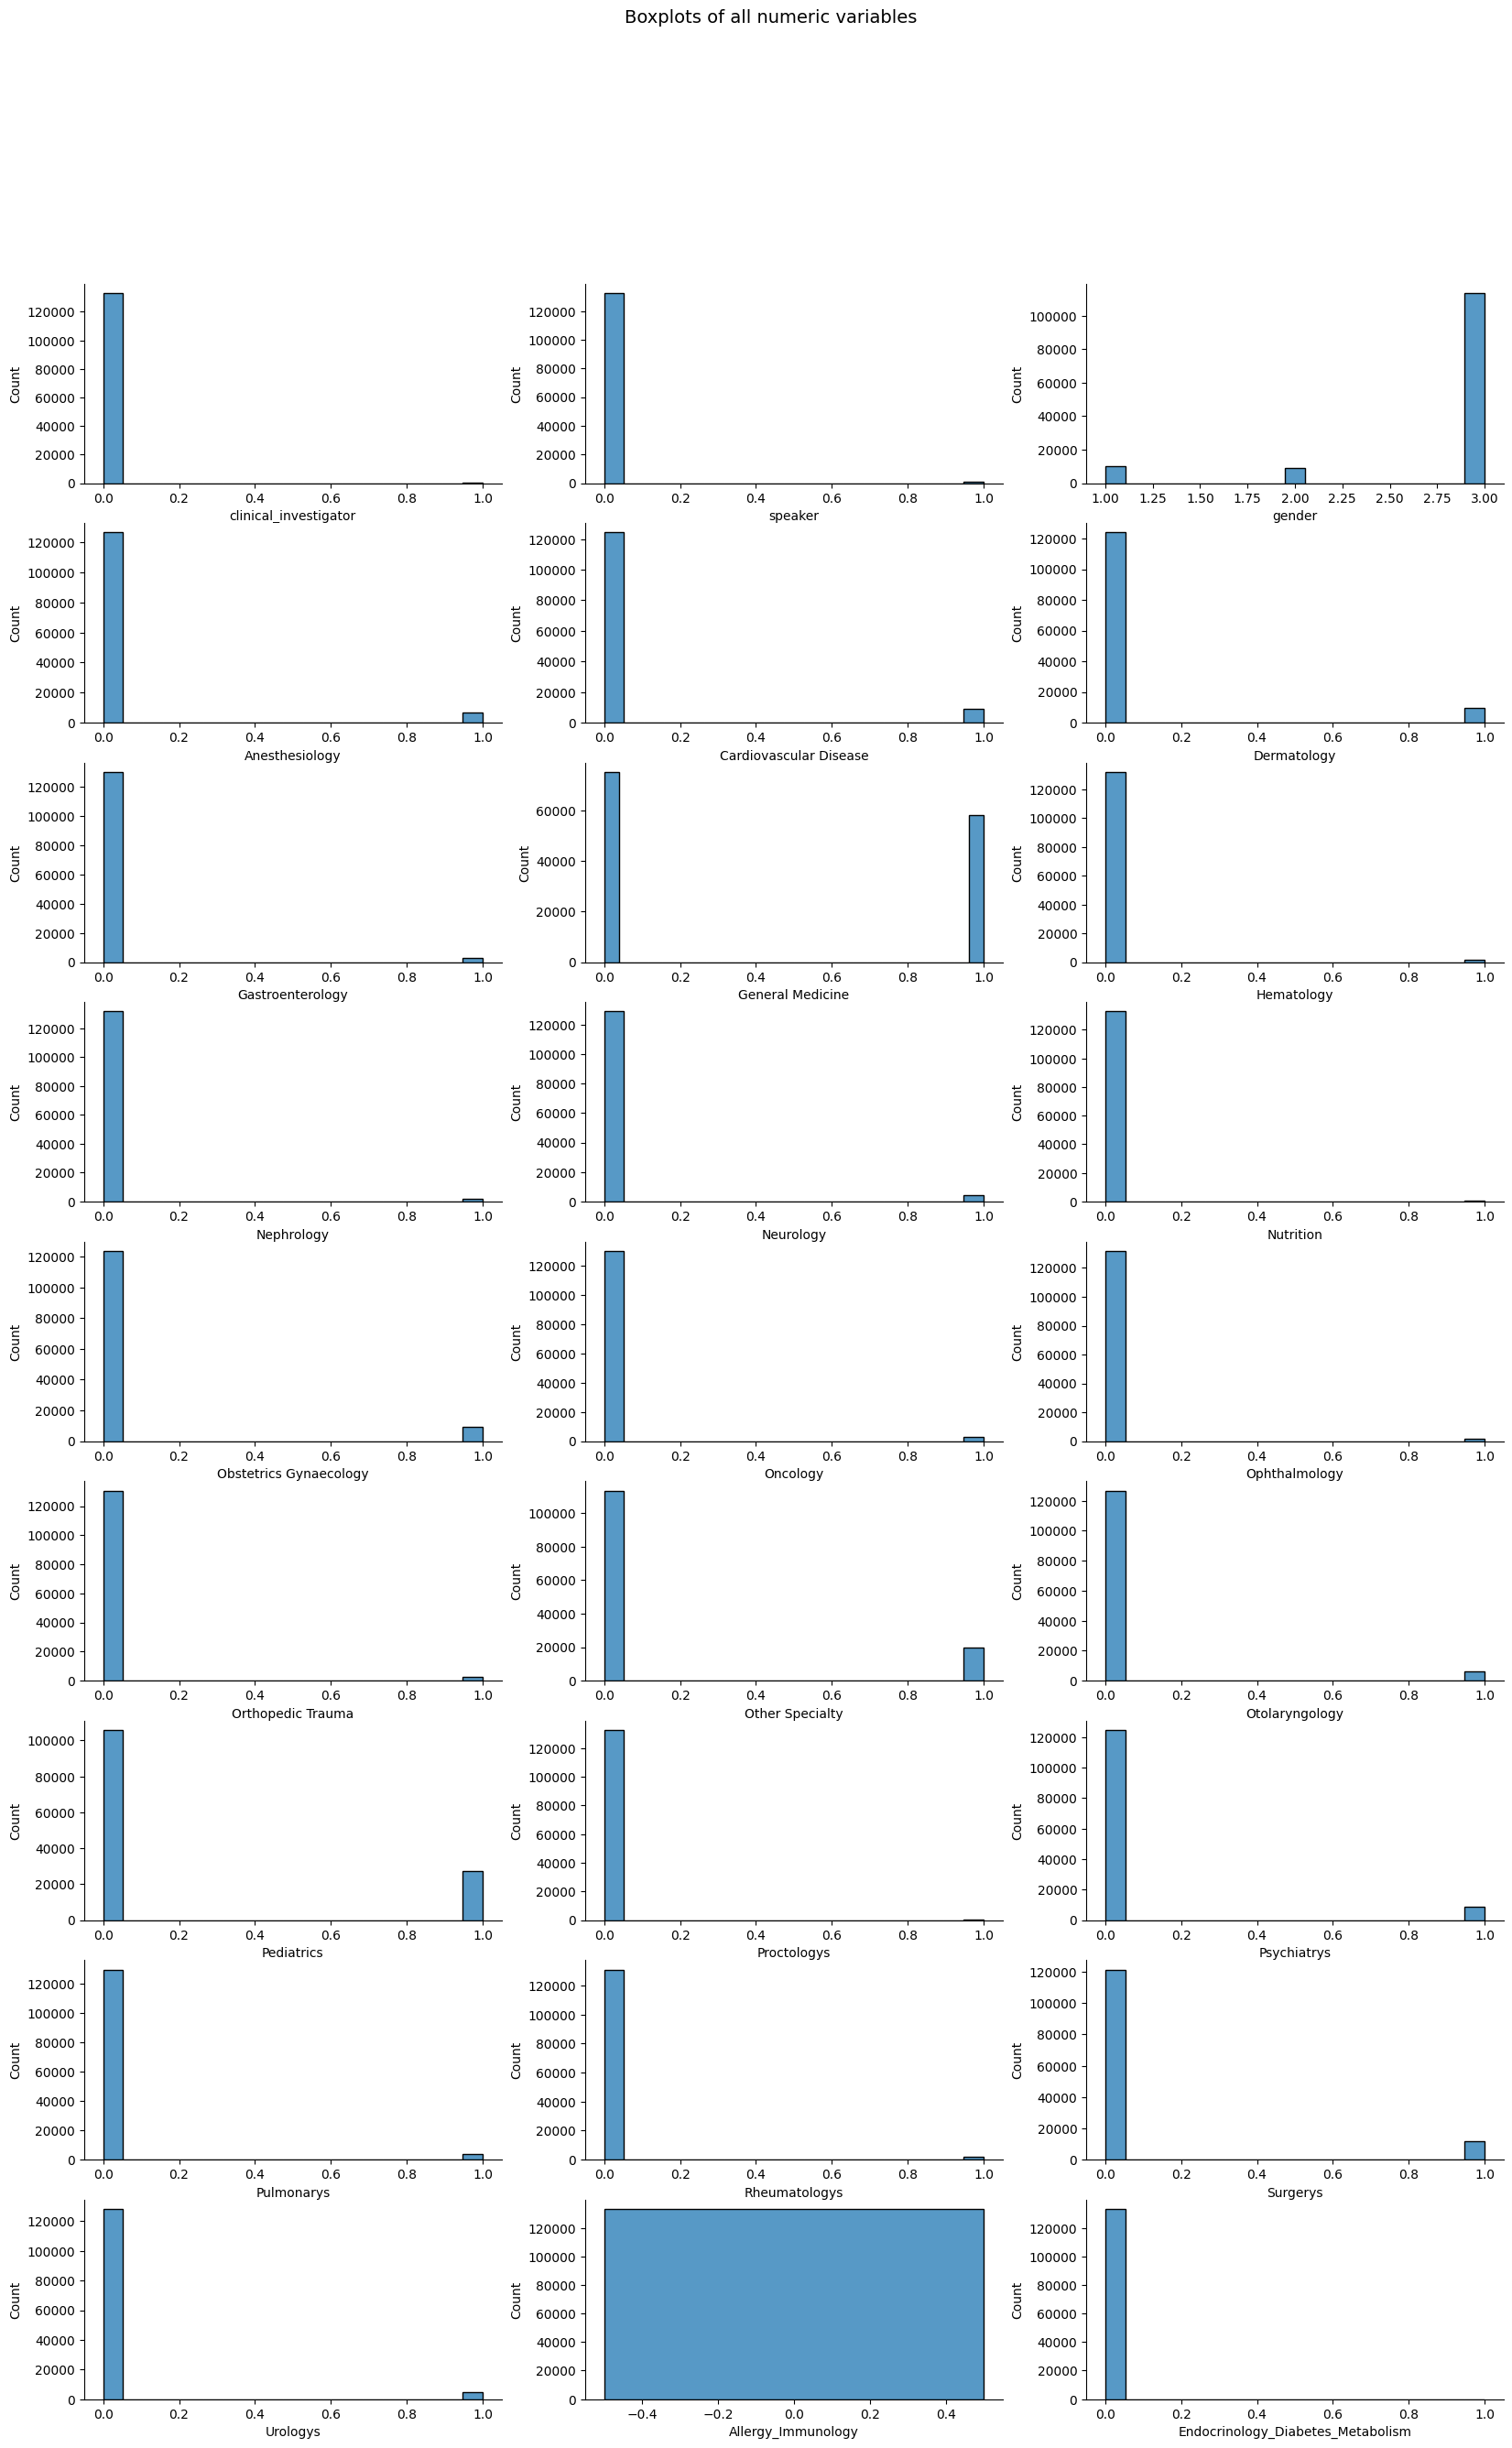

In [60]:
# BOXPLOT (ALL NUMERIC VARIABLES)

# Draw
demographic = ["clinical_investigator","speaker","gender","Anesthesiology","Cardiovascular Disease","Dermatology","Gastroenterology","General Medicine","Hematology","Nephrology","Neurology","Nutrition","Obstetrics Gynaecology","Oncology","Ophthalmology","Orthopedic Trauma","Other Specialty","Otolaryngology","Pediatrics","Proctologys","Psychiatrys","Pulmonarys","Rheumatologys","Surgerys","Urologys","Allergy_Immunology","Endocrinology_Diabetes_Metabolism","Geriatrics_Gerontology"]
fig, ax = plt.subplots(9, 3, figsize=(20,30))
for var, subplot in zip(ds_features[demographic], ax.flatten()):
    g = sns.histplot(data=ds_features,
                 x=var,
                 ax=subplot)

# Decoration
sns.despine()
plt.rc('axes', labelsize=subPlots_label_fontSize)
fig.suptitle("Boxplots of all numeric variables", fontsize=plots_Title_fontSize);

In [63]:
def my_own_importance(fitted_estimator):
    # for simplicity, we will use the coefficient of the fitted                 
    # model but we only need to output a NumPy array of shape                   
    # (n_features,)                                                             
    return fitted_estimator.coef_

def _get_feature_importances(estimator):
    """Retrieve or aggregate feature importances from estimator"""
    importances = getattr(estimator, "feature_importances_", None)

    if importances is None and hasattr(estimator, "coef_"):
        if estimator.coef_.ndim == 1:
            importances = np.abs(estimator.coef_)

        else:
            importances = np.sum(np.abs(estimator.coef_), axis=0)

    elif importances is None:
        raise ValueError(
            "The underlying estimator %s has no `coef_` or "
            "`feature_importances_` attribute. Either pass a fitted estimator"
            " to SelectFromModel or call fit before calling transform."
            % estimator.__class__.__name__)

    return importances


def single_models(modelo, d_features, d_target, unmatchlabel, tamanho_teste, random, inter, acti, rate, layer):

    print(f"Seleção de variáveis iniciada...{d_target.value_counts()}")
    fs_train_selection, fs_test_selection, tg_train_selection, tg_test_selection = train_test_split(d_features, d_target,
                                                                                                    test_size = 0.30, random_state = random
                                                                                                    #,shuffle = True
                                                                                                    )
                                                                                                    #, stratify = ds_target

    ros = RandomOverSampler(random_state=0)
    X_resampled_select, y_resampled_select = ros.fit_resample(fs_train_selection, tg_train_selection)
    #X_resampled_select, y_resampled_select = fs_train_selection, tg_train_selection
    #adicionar HOLD OUT com train, validation and test
    f1score     = 0
    vAccuracy   = 0
    vPrecision  = 0
    vRecall     = 0
    vMSE        = 0
    unmatch     = 0

    if modelo == "linear":
        LRmodel = LogisticRegression(
            #random_state=1, 
            max_iter=500000)
        print("Iniciado calculo f1_weighted...")
        selector = RFECV(LRmodel, step=1, cv=10, scoring='f1_weighted')
        selector = selector.fit(X_resampled_select, y_resampled_select.values.ravel())

        mask = selector.get_support()
        features = d_features.columns
        best_features = features[mask]
        print(f"Melhores variáveis: {best_features}")

        print("Separando fontes de treinamento e teste...")
        fs_train_source, fs_test_source, tg_train_source, tg_test_source = train_test_split(d_features[best_features], d_target,
                                                                                    test_size = tamanho_teste, random_state = random
                                                                                    #,shuffle = True
                                                                                    )
                                                                                    #, stratify = ds_target
        #ros = RandomOverSampler(random_state=0)
        #ros = RandomUnderSampler(random_state=0)
        #X_resampled, y_resampled = ros.fit_resample(fs_train_source, tg_train_source)
        X_resampled, y_resampled = fs_train_source, tg_train_source

        print(f"Distribuição do label: {y_resampled[unmatchlabel].value_counts()}")
        print("Rodando modelo...")
        y_pred = LRmodel.fit(X_resampled, y_resampled.values.ravel()).predict(fs_test_source)

    elif modelo == "NN":
        NNmodel = MLPClassifier(max_iter = inter, 
                                activation = acti,
                                learning_rate_init = rate, 
                                hidden_layer_sizes=(layer))
        LRmodel = LogisticRegression(
            #random_state=1, 
            max_iter=500000)
        print("Iniciado calculo f1_weighted...")
        selector = RFECV(LRmodel, step=1, cv=10, scoring='f1_weighted'
                         #, importance_getter=_get_feature_importances
                         )
        selector = selector.fit(X_resampled_select, y_resampled_select.values.ravel())

        mask = selector.get_support()
        features = d_features.columns
        best_features = features[mask]
        print(f"Melhores variáveis: {best_features}")

        print("Separando fontes de treinamento e teste...")
        fs_train_source, fs_test_source, tg_train_source, tg_test_source = train_test_split(d_features[best_features], d_target,
                                                                                    test_size = tamanho_teste, random_state = random
                                                                                    #,shuffle = True
                                                                                    )
                                                                                    #, stratify = ds_target
        #print(f"Tamanho teste: {str(fs_test_source.count)} - {str(tamanho_teste)}")
        ros = RandomOverSampler(random_state=0)
        X_resampled, y_resampled = ros.fit_resample(fs_train_source, tg_train_source)
        print(f"Distribuição do label: {y_resampled[unmatchlabel].value_counts()}")
        print("Rodando modelo...")
        y_pred = NNmodel.fit(X_resampled, y_resampled.values.ravel()).predict(fs_test_source)

    elif modelo == "TREE":
        DTmodel = DecisionTreeClassifier(random_state=0)
        #LRmodel = LogisticRegression(
            #random_state=1, 
        #   max_iter=500000)
        print("Iniciado calculo f1_weighted...")
        selector = RFECV(DTmodel, step=1, cv=10, scoring='f1_weighted'
                         #, importance_getter=_get_feature_importances
                         )
        selector = selector.fit(X_resampled_select, y_resampled_select.values.ravel())

        mask = selector.get_support()
        features = d_features.columns
        best_features = features[mask]
        print(f"Melhores variáveis: {best_features}")

        print("Separando fontes de treinamento e teste...")
        fs_train_source, fs_test_source, tg_train_source, tg_test_source = train_test_split(d_features[best_features], d_target,
                                                                                    test_size = tamanho_teste, random_state = random
                                                                                    #,shuffle = True
                                                                                    )
                                                                                    #, stratify = ds_target
        #print(f"Tamanho teste: {str(fs_test_source.count)} - {str(tamanho_teste)}")
        ros = RandomOverSampler(random_state=0)
        X_resampled, y_resampled = ros.fit_resample(fs_train_source, tg_train_source)
        print(f"Distribuição do label: {y_resampled[unmatchlabel].value_counts()}")
        print("Rodando modelo...")
        y_pred = DTmodel.fit(X_resampled, y_resampled.values.ravel()).predict(fs_test_source)

    elif modelo == "ENSEMBLE":
        DTmodel = RandomForestClassifier(n_estimators=10)
        #LRmodel = LogisticRegression(
            #random_state=1, 
        #   max_iter=500000)
        print("Iniciado calculo f1_weighted...")
        selector = RFECV(DTmodel, step=1, cv=10, scoring='f1_weighted'
                         #, importance_getter=_get_feature_importances
                         )
        selector = selector.fit(X_resampled_select, y_resampled_select.values.ravel())

        mask = selector.get_support()
        features = d_features.columns
        best_features = features[mask]
        print(f"Melhores variáveis: {best_features}")

        print("Separando fontes de treinamento e teste...")
        fs_train_source, fs_test_source, tg_train_source, tg_test_source = train_test_split(d_features[best_features], d_target,
                                                                                    test_size = tamanho_teste, random_state = random
                                                                                    #,shuffle = True
                                                                                    )
                                                                                    #, stratify = ds_target
        #print(f"Tamanho teste: {str(fs_test_source.count)} - {str(tamanho_teste)}")
        ros = RandomOverSampler(random_state=0)
        X_resampled, y_resampled = ros.fit_resample(fs_train_source, tg_train_source)
        print(f"Distribuição do label: {y_resampled[unmatchlabel].value_counts()}")
        print("Rodando modelo...")
        y_pred = DTmodel.fit(X_resampled, y_resampled.values.ravel()).predict(fs_test_source)

    f1score     = f1_score(tg_test_source, y_pred, average='weighted')
    vAccuracy   = accuracy_score(tg_test_source, y_pred)
    vError      = zero_one_loss(tg_test_source, y_pred)
    vPrecision  = precision_score(tg_test_source, y_pred, average='weighted')
    vRecall     = recall_score(tg_test_source, y_pred, average='weighted')
    vMSE        = mean_squared_error(y_pred, tg_test_source, squared=False)
    #print((tg_test_source['e-Mail_1to1'] != y_pred).sum())
    unmatch     = (tg_test_source[unmatchlabel] != y_pred).sum()
    #
    #print(tg_test_source['e-Mail_1to1'])
    #print(y_pred)
    print("Retorno da função de label único...")
    return f1score, vAccuracy, vError, vPrecision, vRecall, vMSE, tg_test_source, y_pred, unmatch, len(best_features), best_features


def convertTuple(tup):
    return ''.join([str(x) + ',' for x in tup])


# DUMMY CLASSIFIER

In [ ]:
fs_train_selection, fs_test_selection, tg_train_selection, tg_test_selection = train_test_split(ds_features, ds_target,
                                                                                                test_size = 0.30, random_state = 0
                                                                                                )

dummy_clf = DummyClassifier(strategy="most_frequent")
# Dummy
Y_dummy_resultado = dummy_clf.fit(fs_train_selection, tg_train_selection).predict(fs_test_selection)
dmm_training = dummy_clf.score(fs_test_selection, tg_test_selection)
dmm_testing = f1_score(tg_test_selection, Y_dummy_resultado, average='weighted')
dmm_vAccuracy   = accuracy_score(tg_test_selection, Y_dummy_resultado)
dmm_vError      = zero_one_loss(tg_test_selection, Y_dummy_resultado)
dmm_vPrecision  = precision_score(tg_test_selection, Y_dummy_resultado, average='weighted')
dmm_vRecall     = recall_score(tg_test_selection, Y_dummy_resultado, average='weighted')
print(f"Score: {dmm_training} - f1 score: {dmm_testing} - Accuracy: {dmm_vAccuracy} - Error Rate: {dmm_vError} - Precision: {dmm_vPrecision} - Recall: {dmm_vRecall}")


# LINEAR LOGISTIC REGRESSION

In [ ]:
mF1score    = 0
mAccuracy   = 0
mPrecision  = 0
mRecall     = 0
mMSE        = 0
mUnmatch    = 0
tamanho = ds_features.columns.shape[0]+1
label_to_   = 'F2F_f2f'
#warnings.filterwarnings('ignore', category=RuntimeWarning, append=True)
df_resultado = pd.DataFrame()
df_summary_result = pd.DataFrame()

for cl in labels_only:
    #for fn in range(5,tamanho):
    #    f_classif_selection     = SelectKBest(f_classif, k=fn)
    #    X_f_classif             = f_classif_selection.fit_transform(ds_features, ds_target[[cl]].values.ravel())
    #    sfeatures_f_classif     = pd.Series(f_classif_selection.get_support(), index = ds_features.columns)
    #    D                       = sfeatures_f_classif[sfeatures_f_classif == True].index.tolist()
    #    rF1score, rAccuracy, rError, rPrecision, rRecall, rMSE, y_true, y_pred, y_unmatch = single_models("linear", ds_features[D], ds_target[[cl]], cl, 0.3, 42, 0, 0, 0, 0)

    #try:
    print(f"Label to predict: {cl}")
    if len(ds_target[cl].value_counts()) > 1:
        rF1score, rAccuracy, rError, rPrecision, rRecall, rMSE, y_true, retorno_y_pred, y_unmatch, fn, D = single_models("linear", ds_features, ds_target[[cl]], cl, 0.30, 42, 0, 0, 0, 0)

        mF1score    = rF1score
        mAccuracy   = rAccuracy
        mError      = rError
        mPrecision  = rPrecision
        mRecall     = rRecall
        mMSE        = rMSE
        qVariaveis  = fn        # Quantidade de variaveis
        lVariaveis  = D         # Variáveis
        m_true      = y_true    # valores verdadeiros
        mUnmatch    = y_unmatch # resultado com labels difetrentes
        ty_pred     = retorno_y_pred    # resultado da predição

        dict = {'hcpid': m_true.index, 'channel': cl,  'yvalue': ty_pred.tolist()}  
        df_resultado = pd.concat([df_resultado, pd.DataFrame(dict)])

        dict_resultado = {'channel': cl, 'Qtd variáveis': qVariaveis, 'F1score': mF1score, 'Accuracy': mAccuracy, 'Error rate': mError, 'Precision': mPrecision, 'Recall': mRecall, 'MSE': mMSE, 'Feature': convertTuple(lVariaveis)
                          , 'shapes': f"{m_true.shape}-{m_true[m_true[cl] == ty_pred].shape}"
                          }
        
        df_summary_result = pd.concat([df_summary_result, pd.DataFrame(dict_resultado, index=[cl])])


        print(f"Qtd variáveis: {qVariaveis}\nF1score: {mF1score}\nAccuracy: {mAccuracy}\nError rate: {mError}\nPrecision: {mPrecision}\nRecall: {mRecall}\nMSE: {mMSE}\nfeature: {lVariaveis}\nPredict labels: {m_true[m_true[cl] == ty_pred]}\nshapes: {m_true.shape}-{m_true[m_true[cl] == ty_pred].shape}")
        #espera = input("Espera ai...")
        print(f"{cl} ******************************************************************* Fim")
    else:
        print("Label tem apenas uma classe! Modelo não executado.")
    #except KeyError as error:
    #    print(f"************* Erro: {error}")
    #    pass
dataexecucao = str(datetime.datetime.now())



In [ ]:
df_summary_result.to_csv("thisthesis_logisticregression_oversampling_summary.csv", index=False)
df_resultado.to_csv("thisthesis_logisticregression_oversampling.csv", index=False)

In [ ]:
print(classification_report(m_true, ty_pred))

# NEURAL NETWORK

In [ ]:
mF1score    = 0
mAccuracy   = 0
mPrecision  = 0
mRecall     = 0
mMSE        = 0
mUnmatch    = 0
tamanho = ds_features.columns.shape[0]+1
label_to_   = 'F2F_f2f'
#warnings.filterwarnings('ignore', category=RuntimeWarning, append=True)
df_resultado = pd.DataFrame()
df_summary_result = pd.DataFrame()
actarray = ['relu', 'logistic', 'tanh']
ai=1
i = 400
li = 10
ri = 0.01

for cl in labels_only:
    #for fn in range(5,tamanho):
    #    f_classif_selection     = SelectKBest(f_classif, k=fn)
    #    X_f_classif             = f_classif_selection.fit_transform(ds_features, ds_target[[cl]].values.ravel())
    #    sfeatures_f_classif     = pd.Series(f_classif_selection.get_support(), index = ds_features.columns)
    #    D                       = sfeatures_f_classif[sfeatures_f_classif == True].index.tolist()
    #    rF1score, rAccuracy, rError, rPrecision, rRecall, rMSE, y_true, y_pred, y_unmatch = single_models("linear", ds_features[D], ds_target[[cl]], cl, 0.3, 42, 0, 0, 0, 0)

    #try:
    print(f"Label to predict: {cl}")
    if len(ds_target[cl].value_counts()) > 1:
        rF1score, rAccuracy, rError, rPrecision, rRecall, rMSE, y_true, retorno_y_pred, y_unmatch, fn, D = single_models("NN", ds_features, ds_target[[cl]], cl, 0.30, 42, i, actarray[ai], ri, li)

        mF1score    = rF1score
        mAccuracy   = rAccuracy
        mError      = rError
        mPrecision  = rPrecision
        mRecall     = rRecall
        mMSE        = rMSE
        qVariaveis  = fn        # Quantidade de variaveis
        lVariaveis  = D         # Variáveis
        m_true      = y_true    # valores verdadeiros
        mUnmatch    = y_unmatch # resultado com labels difetrentes
        ty_pred     = retorno_y_pred    # resultado da predição

        dict = {'hcpid': m_true.index, 'channel': cl,  'yvalue': ty_pred.tolist()}  
        df_resultado = pd.concat([df_resultado, pd.DataFrame(dict)])

        dict_resultado = {'channel': cl, 'Qtd variáveis': qVariaveis, 'F1score': mF1score, 'Accuracy': mAccuracy, 'Error rate': mError, 'Precision': mPrecision, 'Recall': mRecall, 'MSE': mMSE, 'Feature': convertTuple(lVariaveis)
                          , 'shapes': f"{m_true.shape}-{m_true[m_true[cl] == ty_pred].shape}"
                          }
        
        df_summary_result = pd.concat([df_summary_result, pd.DataFrame(dict_resultado, index=[cl])])


        print(f"Qtd variáveis: {qVariaveis}\nF1score: {mF1score}\nAccuracy: {mAccuracy}\nError rate: {mError}\nPrecision: {mPrecision}\nRecall: {mRecall}\nMSE: {mMSE}\nfeature: {lVariaveis}\nPredict labels: {m_true[m_true[cl] == ty_pred]}\nshapes: {m_true.shape}-{m_true[m_true[cl] == ty_pred].shape}")
        #espera = input("Espera ai...")
        print(f"{cl} ******************************************************************* Fim")
    else:
        print("Label tem apenas uma classe! Modelo não executado.")
    #except KeyError as error:
    #    print(f"************* Erro: {error}")
    #    pass
dataexecucao = str(datetime.datetime.now())



In [ ]:
df_summary_result.to_csv("thisthesis_NN_oversampling_summary.csv", index=False)
df_resultado.to_csv("thisthesis_NN_oversampling.csv", index=False)


# DECISION TREE

In [62]:
mF1score    = 0
mAccuracy   = 0
mPrecision  = 0
mRecall     = 0
mMSE        = 0
mUnmatch    = 0
tamanho = ds_features.columns.shape[0]+1
label_to_   = 'F2F_f2f'
#warnings.filterwarnings('ignore', category=RuntimeWarning, append=True)
df_resultado = pd.DataFrame()
df_summary_result = pd.DataFrame()
actarray = ['relu', 'logistic', 'tanh']
ai=1
i = 400
li = 10
ri = 0.01

for cl in labels_only:
    #for fn in range(5,tamanho):
    #    f_classif_selection     = SelectKBest(f_classif, k=fn)
    #    X_f_classif             = f_classif_selection.fit_transform(ds_features, ds_target[[cl]].values.ravel())
    #    sfeatures_f_classif     = pd.Series(f_classif_selection.get_support(), index = ds_features.columns)
    #    D                       = sfeatures_f_classif[sfeatures_f_classif == True].index.tolist()
    #    rF1score, rAccuracy, rError, rPrecision, rRecall, rMSE, y_true, y_pred, y_unmatch = single_models("linear", ds_features[D], ds_target[[cl]], cl, 0.3, 42, 0, 0, 0, 0)

    #try:
    print(f"Label to predict: {cl}")
    if len(ds_target[cl].value_counts()) > 1:
        rF1score, rAccuracy, rError, rPrecision, rRecall, rMSE, y_true, retorno_y_pred, y_unmatch, fn, D = single_models("TREE", ds_features, ds_target[[cl]], cl, 0.30, 42, i, actarray[ai], ri, li)

        mF1score    = rF1score
        mAccuracy   = rAccuracy
        mError      = rError
        mPrecision  = rPrecision
        mRecall     = rRecall
        mMSE        = rMSE
        qVariaveis  = fn        # Quantidade de variaveis
        lVariaveis  = D         # Variáveis
        m_true      = y_true    # valores verdadeiros
        mUnmatch    = y_unmatch # resultado com labels difetrentes
        ty_pred     = retorno_y_pred    # resultado da predição

        dict = {'hcpid': m_true.index, 'channel': cl,  'yvalue': ty_pred.tolist()}  
        df_resultado = pd.concat([df_resultado, pd.DataFrame(dict)])

        dict_resultado = {'channel': cl, 'Qtd variáveis': qVariaveis, 'F1score': mF1score, 'Accuracy': mAccuracy, 'Error rate': mError, 'Precision': mPrecision, 'Recall': mRecall, 'MSE': mMSE, 'Feature': convertTuple(lVariaveis)
                          , 'shapes': f"{m_true.shape}-{m_true[m_true[cl] == ty_pred].shape}"
                          }
        
        df_summary_result = pd.concat([df_summary_result, pd.DataFrame(dict_resultado, index=[cl])])


        print(f"Qtd variáveis: {qVariaveis}\nF1score: {mF1score}\nAccuracy: {mAccuracy}\nError rate: {mError}\nPrecision: {mPrecision}\nRecall: {mRecall}\nMSE: {mMSE}\nfeature: {lVariaveis}\nPredict labels: {m_true[m_true[cl] == ty_pred]}\nshapes: {m_true.shape}-{m_true[m_true[cl] == ty_pred].shape}")
        #espera = input("Espera ai...")
        print(f"{cl} ******************************************************************* Fim")
    else:
        print("Label tem apenas uma classe! Modelo não executado.")
    #except KeyError as error:
    #    print(f"************* Erro: {error}")
    #    pass
dataexecucao = str(datetime.datetime.now())



Label to predict: MEETINGS_F2F_Meetings
Seleção de variáveis iniciada...MEETINGS_F2F_Meetings
0.0                      125134
1.0                        8096
Name: count, dtype: int64
Iniciado calculo f1_weighted...
Melhores variáveis: Index(['J01-AMOXICILINA CLAVUL'], dtype='object')
Separando fontes de treinamento e teste...
Distribuição do label: MEETINGS_F2F_Meetings
0.0    87673
1.0    87673
Name: count, dtype: int64
Rodando modelo...


c:\Users\reinaldobarros\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Retorno da função de label único...
Qtd variáveis: 1
F1score: 0.71530932972411
Accuracy: 0.617603642823188
Error rate: 0.382396357176812
Precision: 0.9018136513715
Recall: 0.617603642823188
MSE: 0.6183820479095524
feature: Index(['J01-AMOXICILINA CLAVUL'], dtype='object')
Predict labels:                     MEETINGS_F2F_Meetings
hcpid                                    
0016100000SGhyAAAT                    0.0
0016100000Noi19AAB                    0.0
0016100000NoXmPAAV                    0.0
0016100000NokkJAAR                    0.0
0016100000Noo6cAAB                    0.0
...                                   ...
0016100000Np5PUAAZ                    0.0
0016100000SGpNRAA1                    0.0
0016100000NouiuAAB                    0.0
0016100000SGH8wAAH                    0.0
0016100000NoZEaAAN                    0.0

[24685 rows x 1 columns]
shapes: (39969, 1)-(24685, 1)
MEETINGS_F2F_Meetings ******************************************************************* Fim
Label to predic

c:\Users\reinaldobarros\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Iniciado calculo f1_weighted...
Melhores variáveis: Index(['J01-AMOXICILINA CLAVUL', 'J01-ZINNAT TOTAL'], dtype='object')
Separando fontes de treinamento e teste...
Distribuição do label: MEETINGS_REMOTE_MEETING
0.0    84014
1.0    84014
Name: count, dtype: int64
Rodando modelo...


c:\Users\reinaldobarros\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Retorno da função de label único...
Qtd variáveis: 2
F1score: 0.7852753597438603
Accuracy: 0.747904626085216
Error rate: 0.252095373914784
Precision: 0.8354545166825751
Recall: 0.747904626085216
MSE: 0.50209100162698
feature: Index(['J01-AMOXICILINA CLAVUL', 'J01-ZINNAT TOTAL'], dtype='object')
Predict labels:                     MEETINGS_REMOTE_MEETING
hcpid                                      
0016100000SGhyAAAT                      0.0
0016100000Noi19AAB                      0.0
0016100000NojA4AAJ                      1.0
0016100000SGP46AAH                      0.0
0016100000NoXmPAAV                      0.0
...                                     ...
0016100000NoZE2AAN                      0.0
0016100000NojXQAAZ                      0.0
0016100000NouiuAAB                      0.0
0016100000SGH8wAAH                      0.0
0016100000NoZEaAAN                      0.0

[29893 rows x 1 columns]
shapes: (39969, 1)-(29893, 1)
MEETINGS_REMOTE_MEETING ************************************

c:\Users\reinaldobarros\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Retorno da função de label único...
Qtd variáveis: 44
F1score: 0.7677145837902573
Accuracy: 0.7674948084765694
Error rate: 0.23250519152343063
Precision: 0.7679356795156751
Recall: 0.7674948084765694
MSE: 0.4821879213786163
feature: Index(['gender', 'Anesthesiology', 'Cardiovascular Disease', 'Dermatology',
       'Gastroenterology', 'General Medicine', 'Hematology', 'Nephrology',
       'Neurology', 'Obstetrics Gynaecology', 'Oncology', 'Orthopedic Trauma',
       'Other Specialty', 'Otolaryngology', 'Pediatrics', 'Psychiatrys',
       'Pulmonarys', 'Rheumatologys', 'Surgerys', 'Urologys',
       'R03-TRELEGY BRONCO', 'J05-A.HERPETICOS', 'G04-HPB', 'N06-BUPROPIONA',
       'R03-ASMA RESGATE', 'D10-RETINOIDES', 'D11-TARGET ALOPECIA',
       'J01-AMOXICILINA', 'J01-AMOXICILINA CLAVUL', 'R01-CORT.NASAIS',
       'D07-DERMATITE', 'D10-ACNE COMBINACAO', 'J01-ZINNAT TOTAL',
       'R03-ICS LABA ASMA', 'R03-A.ASMATICOS CORT.I', 'G04-HPB TNS',
       'N06-ANTDEPRESSAO-SSRI', 'R03-ICS LABA ASM

c:\Users\reinaldobarros\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Retorno da função de label único...
Qtd variáveis: 2
F1score: 0.7043907069470899
Accuracy: 0.664114688883885
Error rate: 0.33588531111611497
Precision: 0.765685678382081
Recall: 0.664114688883885
MSE: 0.579556132843157
feature: Index(['J01-AMOXICILINA', 'J01-ZINNAT TOTAL'], dtype='object')
Predict labels:                     e-Mail_Mass
hcpid                          
0016100000SGhyAAAT          1.0
0016100000SH9lUAAT          0.0
0016100000Noi19AAB          1.0
0016100000SGP46AAH          0.0
0016100000NoXmPAAV          1.0
...                         ...
0016100000Np5PUAAZ          0.0
0016100000SGpNRAA1          1.0
0016100000NouiuAAB          1.0
0016100000SGH8wAAH          1.0
0016100000NoZEaAAN          1.0

[26544 rows x 1 columns]
shapes: (39969, 1)-(26544, 1)
e-Mail_Mass ******************************************************************* Fim
Label to predict: Webinar_Webinar
Seleção de variáveis iniciada...Webinar_Webinar
0.0                132731
1.0                   499
Nam

c:\Users\reinaldobarros\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Iniciado calculo f1_weighted...
Melhores variáveis: Index(['clinical_investigator', 'speaker', 'gender', 'Anesthesiology',
       'Cardiovascular Disease', 'Dermatology', 'Gastroenterology',
       'General Medicine', 'Hematology', 'Nephrology', 'Neurology',
       'Nutrition', 'Obstetrics Gynaecology', 'Oncology', 'Ophthalmology',
       'Orthopedic Trauma', 'Other Specialty', 'Otolaryngology', 'Pediatrics',
       'Proctologys', 'Psychiatrys', 'Pulmonarys', 'Rheumatologys', 'Surgerys',
       'Urologys', 'R03-TRELEGY BRONCO', 'J05-A.HERPETICOS', 'G04-HPB',
       'N06-BUPROPIONA', 'R03-ASMA RESGATE', 'D10-RETINOIDES',
       'D11-TARGET ALOPECIA', 'J01-AMOXICILINA', 'J01-AMOXICILINA CLAVUL',
       'R01-CORT.NASAIS', 'D07-DERMATITE', 'D10-ACNE COMBINACAO',
       'J01-ZINNAT TOTAL', 'R03-ICS LABA ASMA', 'R03-A.ASMATICOS CORT.I',
       'G04-HPB TNS', 'N06-ANTDEPRESSAO-SSRI', 'R03-ICS LABA ASMA SRT',
       'N03-LAMOTRIGINAS', 'D06-TARGET BACTROBAN', 'R03-TARGET TRELEGY',
       'J01-

c:\Users\reinaldobarros\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Retorno da função de label único...
Qtd variáveis: 49
F1score: 0.7008495022891793
Accuracy: 0.700843153443919
Error rate: 0.299156846556081
Precision: 0.700855873144209
Recall: 0.700843153443919
MSE: 0.546952325670237
feature: Index(['clinical_investigator', 'speaker', 'gender', 'Anesthesiology',
       'Cardiovascular Disease', 'Dermatology', 'Gastroenterology',
       'General Medicine', 'Hematology', 'Nephrology', 'Neurology',
       'Nutrition', 'Obstetrics Gynaecology', 'Oncology', 'Ophthalmology',
       'Orthopedic Trauma', 'Other Specialty', 'Otolaryngology', 'Pediatrics',
       'Proctologys', 'Psychiatrys', 'Pulmonarys', 'Rheumatologys', 'Surgerys',
       'Urologys', 'R03-TRELEGY BRONCO', 'J05-A.HERPETICOS', 'G04-HPB',
       'N06-BUPROPIONA', 'R03-ASMA RESGATE', 'D10-RETINOIDES',
       'D11-TARGET ALOPECIA', 'J01-AMOXICILINA', 'J01-AMOXICILINA CLAVUL',
       'R01-CORT.NASAIS', 'D07-DERMATITE', 'D10-ACNE COMBINACAO',
       'J01-ZINNAT TOTAL', 'R03-ICS LABA ASMA', 'R03-A.A

c:\Users\reinaldobarros\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
df_summary_result.to_csv("thisthesis_TREE_oversampling_summary.csv", index=False)
df_resultado.to_csv("thisthesis_TREE_oversampling.csv", index=False)


# ENSEMBLE DECISION TREE

In [ ]:
mF1score    = 0
mAccuracy   = 0
mPrecision  = 0
mRecall     = 0
mMSE        = 0
mUnmatch    = 0
tamanho = ds_features.columns.shape[0]+1
label_to_   = 'F2F_f2f'
#warnings.filterwarnings('ignore', category=RuntimeWarning, append=True)
df_resultado = pd.DataFrame()
df_summary_result = pd.DataFrame()
actarray = ['relu', 'logistic', 'tanh']
ai=1
i = 400
li = 10
ri = 0.01

for cl in labels_only:
    #for fn in range(5,tamanho):
    #    f_classif_selection     = SelectKBest(f_classif, k=fn)
    #    X_f_classif             = f_classif_selection.fit_transform(ds_features, ds_target[[cl]].values.ravel())
    #    sfeatures_f_classif     = pd.Series(f_classif_selection.get_support(), index = ds_features.columns)
    #    D                       = sfeatures_f_classif[sfeatures_f_classif == True].index.tolist()
    #    rF1score, rAccuracy, rError, rPrecision, rRecall, rMSE, y_true, y_pred, y_unmatch = single_models("linear", ds_features[D], ds_target[[cl]], cl, 0.3, 42, 0, 0, 0, 0)

    #try:
    print(f"Label to predict: {cl}")
    if len(ds_target[cl].value_counts()) > 1:
        rF1score, rAccuracy, rError, rPrecision, rRecall, rMSE, y_true, retorno_y_pred, y_unmatch, fn, D = single_models("ENSEMBLE", ds_features, ds_target[[cl]], cl, 0.30, 42, i, actarray[ai], ri, li)

        mF1score    = rF1score
        mAccuracy   = rAccuracy
        mError      = rError
        mPrecision  = rPrecision
        mRecall     = rRecall
        mMSE        = rMSE
        qVariaveis  = fn        # Quantidade de variaveis
        lVariaveis  = D         # Variáveis
        m_true      = y_true    # valores verdadeiros
        mUnmatch    = y_unmatch # resultado com labels difetrentes
        ty_pred     = retorno_y_pred    # resultado da predição

        dict = {'hcpid': m_true.index, 'channel': cl,  'yvalue': ty_pred.tolist()}  
        df_resultado = pd.concat([df_resultado, pd.DataFrame(dict)])

        dict_resultado = {'channel': cl, 'Qtd variáveis': qVariaveis, 'F1score': mF1score, 'Accuracy': mAccuracy, 'Error rate': mError, 'Precision': mPrecision, 'Recall': mRecall, 'MSE': mMSE, 'Feature': convertTuple(lVariaveis)
                          , 'shapes': f"{m_true.shape}-{m_true[m_true[cl] == ty_pred].shape}"
                          }
        
        df_summary_result = pd.concat([df_summary_result, pd.DataFrame(dict_resultado, index=[cl])])


        print(f"Qtd variáveis: {qVariaveis}\nF1score: {mF1score}\nAccuracy: {mAccuracy}\nError rate: {mError}\nPrecision: {mPrecision}\nRecall: {mRecall}\nMSE: {mMSE}\nfeature: {lVariaveis}\nPredict labels: {m_true[m_true[cl] == ty_pred]}\nshapes: {m_true.shape}-{m_true[m_true[cl] == ty_pred].shape}")
        #espera = input("Espera ai...")
        print(f"{cl} ******************************************************************* Fim")
    else:
        print("Label tem apenas uma classe! Modelo não executado.")
    #except KeyError as error:
    #    print(f"************* Erro: {error}")
    #    pass
dataexecucao = str(datetime.datetime.now())



In [ ]:
df_summary_result.to_csv("thisthesis_RANDOMFOREST_oversampling_summary.csv", index=False)
df_resultado.to_csv("thisthesis_RANDOMFOREST_oversampling.csv", index=False)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(ds_features, ds_target, test_size=0.3, random_state=420)
display(Y_train)

# CLASSIFIER CHAIN - 10 CADEIAS

In [ ]:
# Load a multi-label dataset from https://www.openml.org/d/40597
X_train, X_test, Y_train, Y_test = train_test_split(ds_features, ds_target, test_size=0.3, random_state=420)

#Ensemble Classifier chain já escolhe um subconjunto de dados treinados 
#ros = RandomOverSampler(random_state=0)
#X_resampled_select, y_resampled_select = ros.fit_resample(X_train, Y_train)

base_lr = LogisticRegression(max_iter=10000)
ovr = OneVsRestClassifier(base_lr)
ovr.fit(X_train, Y_train)
Y_pred_ovr = ovr.predict(X_test)
ovr_jaccard_score = jaccard_score(Y_test, Y_pred_ovr, average="samples")

# Run Model 10 randoms
chains = [ClassifierChain(base_lr, order="random", random_state=i) for i in range(0, 10)]
for chain in chains:
    chain.fit(X_train, Y_train)

Y_resultado = np.array([chain.predict(X_test) for chain in chains])

Y_pred_chains = np.array([chain.predict_proba(X_test) for chain in chains])

chain_jaccard_scores = [
    jaccard_score(Y_test, Y_pred_chain >= 0.5, average="samples")
    for Y_pred_chain in Y_pred_chains
]

Y_pred_ensemble = Y_pred_chains.mean(axis=0)
ensemble_jaccard_score = jaccard_score(
    Y_test, Y_pred_ensemble >= 0.5, average="samples"
)

# Plot Results
model_scores = [ovr_jaccard_score] + chain_jaccard_scores + [ensemble_jaccard_score]

model_names = (
    "Independent",
    "Chain 1",
    "Chain 2",
    "Chain 3",
    "Chain 4",
    "Chain 5",
    "Chain 6",
    "Chain 7",
    "Chain 8",
    "Chain 9",
    "Chain 10",
    "Ensemble",
)

x_pos = np.arange(len(model_names))

fig, ax = plt.subplots(figsize=(7, 4))
ax.grid(True)
ax.set_title("Classifier Chain Ensemble Performance Comparison")
ax.set_xticks(x_pos)
ax.set_xticklabels(model_names, rotation="vertical")
ax.set_ylabel("Jaccard Similarity Score")
ax.set_ylim([min(model_scores) * 0.9, max(model_scores) * 1.1])
colors = ["r"] + ["b"] * len(chain_jaccard_scores) + ["g"]
ax.bar(x_pos, model_scores, alpha=0.5, color=colors)
plt.tight_layout()
plt.show()

# CLASSIFIER CHAIN NO RANDOM

In [ ]:
def kpis_results_multiclass(input_Y_test_multilabel, input_Y_resultado, input_Y_pred_chain, input_model):

    df_resultado = pd.DataFrame()
    df_summary_result = pd.DataFrame()
    output_chain_jaccard_score = 0
    output_vMSE = 0

    df_tmp = pd.DataFrame(input_Y_resultado.tolist())
    df_tmp.columns = ['MC_label']
    print(df_tmp)
    df_split_input_test = (pd.DataFrame(df_tmp)['MC_label'].str.split('#',expand=True).astype(float).astype(int))
    df_input_test = pd.DataFrame()
    df_input_test[labels_only] = df_split_input_test

    #output_chain_jaccard_score = jaccard_score(input_Y_test_multilabel, input_Y_pred_chain >= 0.5, average="samples")
    output_f1score     = f1_score(input_Y_test_multilabel, input_Y_resultado, average='weighted')
    output_vAccuracy   = accuracy_score(input_Y_test_multilabel, input_Y_resultado)
    output_vError      = zero_one_loss(input_Y_test_multilabel, input_Y_resultado)
    output_vPrecision  = precision_score(input_Y_test_multilabel, input_Y_resultado, average='weighted')
    output_vRecall     = recall_score(input_Y_test_multilabel, input_Y_resultado, average='weighted')
    #output_vMSE        = root_mean_squared_error(input_Y_resultado, input_Y_test_multilabel)
    print(f"Chain Jaccard: {output_chain_jaccard_score} - F1 Score: {output_f1score} - Accuracy: {output_vAccuracy} - Error: {output_vError} - Precision: {output_vPrecision} - Recall: {output_vRecall} - MSE: {output_vMSE}")

    dict = {'hcpid': input_Y_test_multilabel.index, 'Channels': df_input_test}
    df_resultado = pd.DataFrame(dict['Channels'], columns= labels_only, index=dict['hcpid'])

    dict_resultado =    {'Model': input_model, 'F1score': output_f1score, 'Accuracy': output_vAccuracy, 'Error rate': output_vError, 'Precision': output_vPrecision, 'Recall': output_vRecall, 'MSE': output_vMSE,
                        'shapes': f"{input_Y_test_multilabel.shape}"
                        }

    df_summary_result = pd.DataFrame(dict_resultado, index=['Model'])

    df_summary_result.to_csv(f"thisthesis_{input_model}_oversampling_summary.csv", index=False)
    df_resultado.to_csv(f"thisthesis_{input_model}_oversampling.csv", index=True)
    
    return output_chain_jaccard_score, output_f1score, output_vAccuracy, output_vError, output_vPrecision, output_vRecall, output_vMSE

In [ ]:
def kpis_results(input_Y_test_multilabel, input_Y_resultado, input_Y_pred_chain, input_model):

    df_resultado = pd.DataFrame()
    df_summary_result = pd.DataFrame()
    output_chain_jaccard_score = 0
    output_vMSE = 0

    output_chain_jaccard_score = jaccard_score(input_Y_test_multilabel, input_Y_pred_chain >= 0.5, average="samples")
    output_f1score     = f1_score(input_Y_test_multilabel, input_Y_resultado, average='weighted')
    output_vAccuracy   = accuracy_score(input_Y_test_multilabel, input_Y_resultado)
    output_vError      = zero_one_loss(input_Y_test_multilabel, input_Y_resultado)
    output_vPrecision  = precision_score(input_Y_test_multilabel, input_Y_resultado, average='weighted')
    output_vRecall     = recall_score(input_Y_test_multilabel, input_Y_resultado, average='weighted')
    output_vMSE        = root_mean_squared_error(input_Y_resultado, input_Y_test_multilabel)
    print(f"Chain Jaccard: {output_chain_jaccard_score} - F1 Score: {output_f1score} - Accuracy: {output_vAccuracy} - Error: {output_vError} - Precision: {output_vPrecision} - Recall: {output_vRecall} - MSE: {output_vMSE}")

    dict = {'hcpid': input_Y_test_multilabel.index, 'Channels': input_Y_resultado}
    df_resultado = pd.DataFrame(dict['Channels'], columns= labels_only, index=dict['hcpid'])

    dict_resultado =    {'Model': input_model, 'F1score': output_f1score, 'Accuracy': output_vAccuracy, 'Error rate': output_vError, 'Precision': output_vPrecision, 'Recall': output_vRecall, 'MSE': output_vMSE,
                        'shapes': f"{input_Y_test_multilabel.shape}"
                        }

    df_summary_result = pd.DataFrame(dict_resultado, index=['Model'])

    df_summary_result.to_csv(f"thisthesis_{input_model}_oversampling_summary.csv", index=False)
    df_resultado.to_csv(f"thisthesis_{input_model}_oversampling.csv", index=True)
    
    return output_chain_jaccard_score, output_f1score, output_vAccuracy, output_vError, output_vPrecision, output_vRecall, output_vMSE

Over sampler based on multiclass label - concatenate all label converting to multiclass

In [ ]:
ds_tmp_target_MC = ds_target_MC.copy().drop(labels_only, axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(ds_features, ds_tmp_target_MC, test_size=0.3, random_state=420)

#Ensemble Classifier chain já escolhe um subconjunto de dados treinados 
ros = RandomOverSampler(random_state=0, sampling_strategy='minority')
#ros = RandomUnderSampler(random_state=0)
X_resampled_select, y_resampled_select = ros.fit_resample(X_train, Y_train)


In [ ]:
print(f"Shape features {X_resampled_select.shape} - Shape labels {y_resampled_select.shape}")

Split cancatenated multiclass label into multilabel

In [ ]:
df_split = (pd.DataFrame(y_resampled_select)['MC_label'].str.split('#',expand=True).astype(float).astype(int))
df_split_test = (pd.DataFrame(Y_test)['MC_label'].str.split('#',expand=True).astype(float).astype(int))

In [ ]:
df_novo = pd.DataFrame()
df_novo_test = pd.DataFrame()
df_novo[labels_only] = df_split
df_novo_test[labels_only] = df_split_test

In [ ]:
y_resampled_select_multilabel = df_novo.copy()
Y_test_multilabel = df_novo_test.copy()

In [ ]:
names = ["LR", "NN", "DT", "RF"]
bases = [LogisticRegression(max_iter=500000), 
        MLPClassifier(max_iter = 400, activation = 'logistic', learning_rate_init = 0.01, hidden_layer_sizes=(10)), 
        DecisionTreeClassifier(random_state=0), 
        RandomForestClassifier(n_estimators=10)]
#df_models = pd.DataFrame({"name": ["LR", "NN", "DT", "RF"], "base":[LogisticRegression(max_iter=10000), 
#                                                                    MLPClassifier(max_iter = 400, activation = 'relu', learning_rate_init = 0.01, hidden_layer_sizes=(10)), 
#                                                                    DecisionTreeClassifier(random_state=0), 
#                                                                    RandomForestClassifier(n_estimators=10)]})

In [ ]:
# One vs Rest Classifier multilabel
for m in range(0,4):
    print(f"Rodando modelo {names[m]}...")
    ovr = OneVsRestClassifier(bases[m])
    ovr.fit(X_resampled_select, y_resampled_select_multilabel)
    Y_pred_ovr = ovr.predict(X_test)
    Y_pred_ovr_prodb = ovr.predict_proba(X_test)
    print(f"Score of {names[m]} - {f1_score(Y_test_multilabel, Y_pred_ovr, average='weighted')}")
    #kpis_results(Y_test_multilabel, Y_pred_ovr, Y_pred_ovr_prodb, f'{names[m]}_OneVsRest')

In [ ]:
# MultiClass classifier
for m in range(0,4):
    print(f"Rodando modelo {names[m]}...")
    base_dt = bases[m]
    base_dt.fit(X_resampled_select, y_resampled_select.values.ravel())
    Y_pred_mc = base_dt.predict(X_test)
    Y_pred_mc_prodb = base_dt.predict_proba(X_test)
    kpis_results_multiclass(Y_test, Y_pred_mc, Y_pred_mc_prodb, f'{names[m]}_MultiClass')

In [ ]:
# Run Models
for m in range(0,4):
    print(f"Rodando modelo {names[m]}...")
    chain = ClassifierChain(bases[m])
    chain.fit(X_resampled_select, y_resampled_select_multilabel)
    Y_resultado = chain.predict(X_test)
    Y_pred_chain = chain.predict_proba(X_test)
    print(f"Score of {names[m]} - {f1_score(Y_test_multilabel, Y_resultado, average='weighted')}")
    
    #kpis_results(Y_test_multilabel, Y_resultado, Y_pred_chain, f'{names[m]}_Chain')


In [ ]:
Y_test_multilabel.head(10)

In [ ]:
display(Y_test_multilabel.index)

In [ ]:
display(Y_resultado)

# ANEXOS

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
#X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
#y = np.array([0, 0, 1, 1])
skf = StratifiedKFold(n_splits=8)
skf.get_n_splits(ds_features, ds_tmp_target_MC)
print(skf)
for i, (train_index, test_index) in enumerate(skf.split(ds_features, ds_tmp_target_MC)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

In [ ]:
print(Y_resultado.shape)

In [ ]:
display(Y_resultado)